### Simple Regression with PyTorch

Let’s learn simple regression with PyTorch examples:

In [1]:
# Some useful imports

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

Our network model is a simple Linear layer with an input and an output shape of 1.

In [2]:
class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer = torch.nn.Linear(1, 1)

   def forward(self, x):
       x = self.layer(x)      
       return x

net = Net()
print(net)

Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


Before you start the training process, you need to know our data. You make a random function to test our model.

Y = x^3 sin(x)+ 3x+0.8 rand(100)

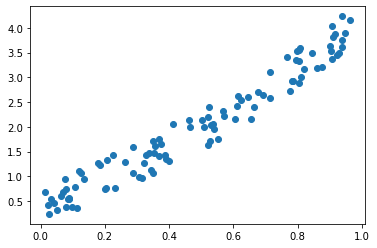

In [3]:
# Visualize our data

x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

Before you start the training process, you need to convert the numpy array to Tensor.

In [4]:
# convert numpy array to tensor in shape of input size

x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print(x, y)

tensor([[0.6553],
        [0.2862],
        [0.7670],
        [0.1780],
        [0.6236],
        [0.8094],
        [0.5269],
        [0.3553],
        [0.1858],
        [0.9013],
        [0.8033],
        [0.5025],
        [0.5722],
        [0.8196],
        [0.6106],
        [0.9383],
        [0.1069],
        [0.9623],
        [0.7967],
        [0.8036],
        [0.1148],
        [0.8596],
        [0.0262],
        [0.3910],
        [0.9055],
        [0.3678],
        [0.3374],
        [0.5085],
        [0.6467],
        [0.8036],
        [0.3696],
        [0.9024],
        [0.7775],
        [0.4637],
        [0.3544],
        [0.9172],
        [0.0311],
        [0.0880],
        [0.5385],
        [0.6039],
        [0.0991],
        [0.7129],
        [0.2864],
        [0.6639],
        [0.0643],
        [0.3755],
        [0.3288],
        [0.9097],
        [0.1260],
        [0.7964],
        [0.9476],
        [0.2013],
        [0.9299],
        [0.0240],
        [0.5682],
        [0

Next, you should define the Optimizer and the Loss Function for our training process. Please note that we are using a different loss function. Can you guess why (of course you can)?

In [5]:
# Define Optimizer and Loss Function

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

Now let’s start our training process. With an epoch of 250, you will iterate our data to find the best value for our weights and biases.

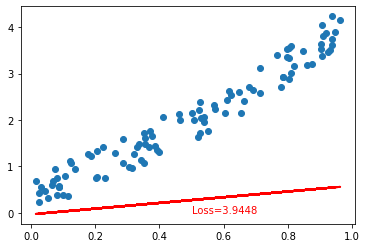

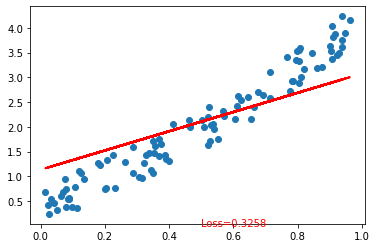

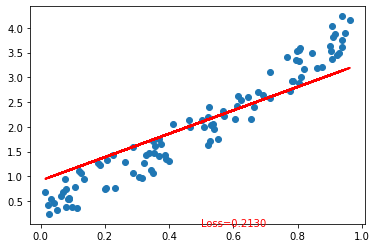

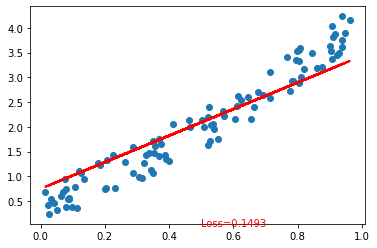

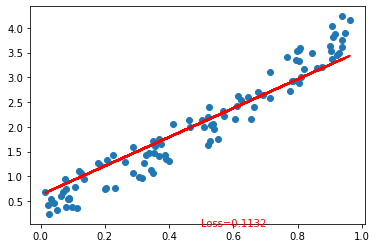

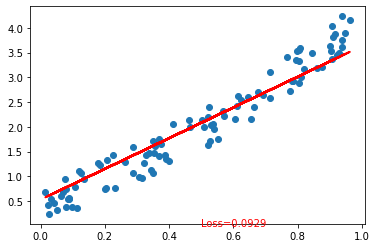

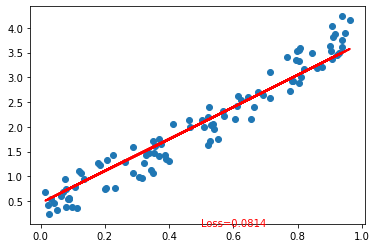

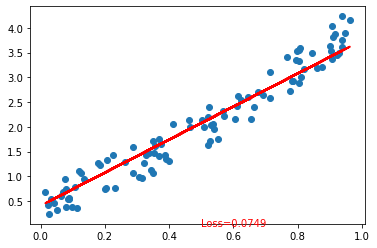

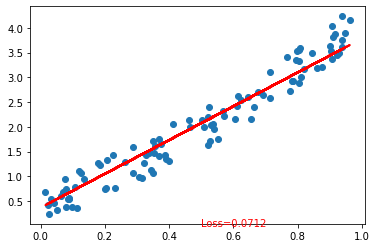

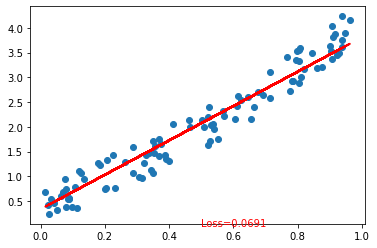

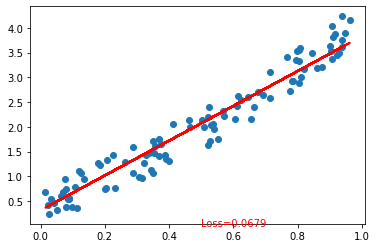

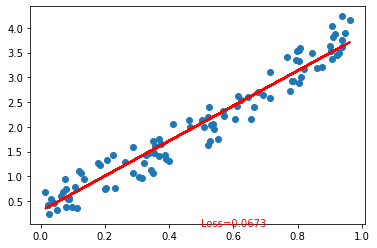

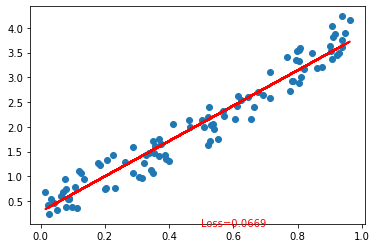

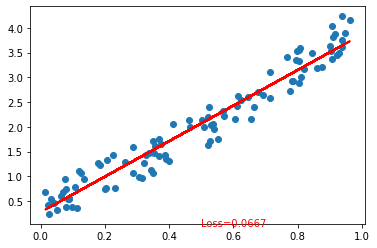

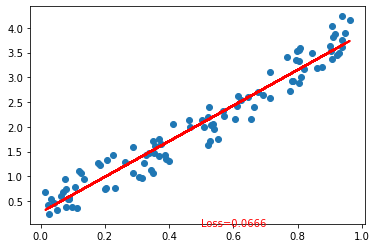

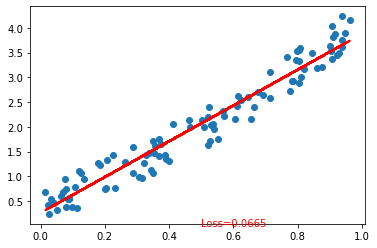

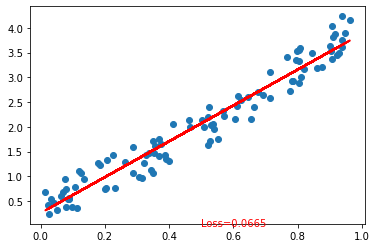

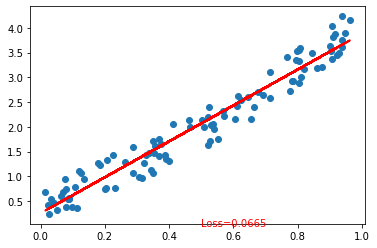

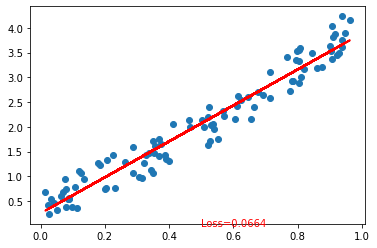

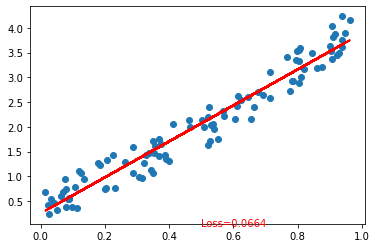

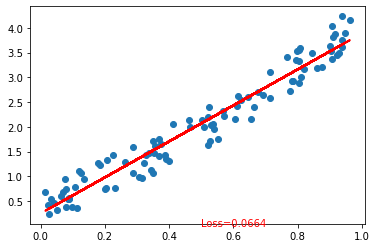

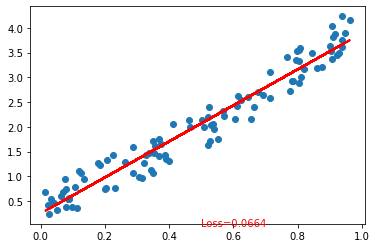

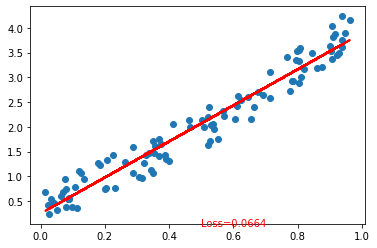

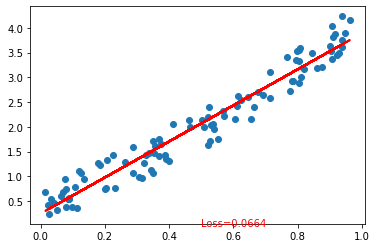

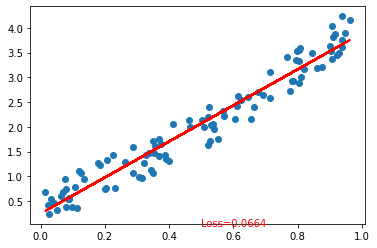

In [6]:
for i in range(250):
    
    prediction = net(x)
    loss = loss_func(prediction, y) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       

    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()

That's it! This was a really simple example, now you can try with an harder one. Pull the Github repo and work in team.